#Artificial Intelligence
## Mid Project

***Implementation of game with the application of Monte Carlo Search Algorithm & Alpha Beta Pruning***

###**SELECTED GAME :**

#**NIM**

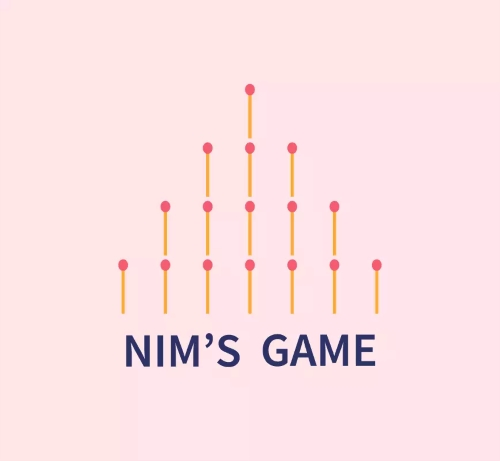

###**ABOUT THE GAME:**

Nim is a classic two-player mathematical strategy game that is often used as a teaching tool for understanding principles of combinatorial game theory. The game is typically played with heaps of objects, such as coins, stones, or matches, and the goal is to prevent your opponent from making the last move.
whoever takes the last object wins the game!

###**RULES:**
Here are the basic rules of Nim:

1. **Setup**: The game starts with several heaps of objects, each heap containing a
  certain number of items.

2. **Players take turns:** The players take turns removing one or more objects from a single heap. However, you must take at least one object on your turn.

3. **Winning condition:** The player who makes the last move, by taking the last object, wins the game.


#Implementation of Nim Using Monte Carlo Search

In [ ]:
import random
#-------------------------------------------------------------------------------------------
#                                       code for AI vs AI
#-------------------------------------------------------------------------------------------

# method to display the current state of game
def display_game_state(rows):
    print("The current state of the game is:")
    print("Row 1:", "o" * rows[0])
    print("Row 2:", "o" * rows[1])
    print("Row 3:", "o" * rows[2])
    print()

def ai_move(rows):
    # Use Monte Carlo search to choose the best move
    best_row, best_num = None, None
    best_score = -1
    for row in range(3):
        for num in range(1, rows[row] + 1):
            score = monte_carlo_score(rows, row, num)
            if score > best_score:
                best_row, best_num = row, num
                best_score = score
    return best_row, best_num

def monte_carlo_score(rows, row, num, num_trials=1000):
    # Simulate the game with the given move and return the win rate using backpropagation
    wins = 0
    for i in range(num_trials):
        rows_copy = rows.copy()
        rows_copy[row] -= num
        #Backpropagation
        #it is updating the no of wins for a specefic move
        if is_winning_position(rows_copy):
            wins += 1
    return wins / num_trials

def is_winning_position(rows):
    # Check if the given position is a winning position
    # A position is winning if the XOR sum of the rows is zero
    xor_sum = 0
    for row in rows:
        xor_sum ^= row
    return xor_sum == 0

def nim_game_ai_vs_ai():
    # Initialize the game
    rows = [3, 5, 7]
    print("Welcome to the game of Nim!")
    print("There are three rows of stones with", rows[0], ",", rows[1], ", and", rows[2], "stones in each row.")
    print("The player who takes the last stone loses.")
    print("Let's begin!\n")

    display_game_state(rows)

    # Game loop
    while True:
        # AI 1's turn
        print("AI 1's turn.")
        row, num = ai_move(rows)
        rows[row] -= num
        print("AI 1 removed", num, "stones from row", row + 1)
        display_game_state(rows)
        if sum(rows) == 0:
            print("AI 1 took the last stone. AI 1 wins!")
            break

        # AI 2's turn
        print("AI 2's turn.")
        row, num = ai_move(rows)
        rows[row] -= num
        print("AI 2 removed", num, "stones from row", row + 1)
        display_game_state(rows)
        if sum(rows) == 0:
            print("AI 2 took the last stone. AI 2 wins!")
            break
#-----------------------------------------------------------------------------------------------------------------
#                                                code for AI vs Player
#-----------------------------------------------------------------------------------------------------------------



def display_game_state(rows):
    print("The current state of the game is:")
    print("Row 1:", "o" * rows[0])
    print("Row 2:", "o" * rows[1])
    print("Row 3:", "o" * rows[2])
    print()

def nim_game():
    # Initialize the game
    rows = [3, 5, 7]
    print("Welcome to the game of Nim!")
    print("There are three rows of stones with", rows[0], ",", rows[1], ", and", rows[2], "stones in each row.")
    print("The player who takes the last stone loses.")
    print("Let's begin!\n")

    display_game_state(rows)

    # Game loop
    while True:
        # Player's turn
        print("Your turn.")
        row = int(input("Choose a row (1-3): ")) - 1
        while row < 0 or row > 2 or rows[row] == 0:
            row = int(input("Invalid row. Choose a row (1-3): ")) - 1
        num = int(input("Choose a number of stones to remove (1-" + str(rows[row]) + "): "))
        while num < 1 or num > rows[row]:
            num = int(input("Invalid number. Choose a number of stones to remove (1-" + str(rows[row]) + "): "))
        rows[row] -= num
        print("You removed", num, "stones from row", row + 1)
        display_game_state(rows)
        if sum(rows) == 0:
            print("You took the last stone. You win!")
            break

        # AI's turn
        print("AI's turn.")
        row, num = ai_move(rows)
        rows[row] -= num
        print("AI removed", num, "stones from row", row + 1)
        display_game_state(rows)
        if sum(rows) == 0:
            print("AI took the last stone. AI wins!")
            break

def ai_move(rows):
    # Use Monte Carlo search to choose the best move
    # selection
    best_row, best_num = None, None
    best_score = -1
    for row in range(3):
        for num in range(1, rows[row] + 1):
            score = monte_carlo_score(rows, row, num)
            if score > best_score:
                best_row, best_num = row, num
                best_score = score
    return best_row, best_num

def monte_carlo_score(rows, row, num, num_trials=1000):
    # Simulate the game with the given move and return the win rate
    wins = 0
    for i in range(num_trials):
        rows_copy = rows.copy()
        rows_copy[row] -= num
        # Backpropagation
        if is_winning_position(rows_copy):
            wins += 1
    return wins / num_trials

def is_winning_position(rows):
    # Check if the given position is a winning position
    # A position is winning if the XOR sum of the rows is zero
    xor_sum = 0
    for row in rows:
        xor_sum ^= row
    return xor_sum == 0
#-----------------------------------------------------------------------------------------------------------------------------
#                                                            main method
#-----------------------------------------------------------------------------------------------------------------------------

if __name__ == "__main__":
    print("Welcome to Nim!")
    while True:
        choice = input("Choose the game mode (AI vs AI: 1, AI vs Player: 2, Quit: Q): ").strip()
        if choice == "1":
            nim_game_ai_vs_ai()
        elif choice == "2":
            nim_game()
        elif choice == "Q":
            break
        else:
            print("Invalid choice. Please enter 1, 2, or Q.")


Welcome to Nim!
Choose the game mode (AI vs AI: 1, AI vs Player: 2, Quit: Q): 2
Welcome to the game of Nim!
There are three rows of stones with 3 , 5 , and 7 stones in each row.
The player who takes the last stone loses.
Let's begin!

The current state of the game is:
Row 1: ooo
Row 2: ooooo
Row 3: ooooooo

Your turn.
Choose a row (1-3): 3
Choose a number of stones to remove (1-7): 1
You removed 1 stones from row 3
The current state of the game is:
Row 1: ooo
Row 2: ooooo
Row 3: oooooo

AI's turn.
AI removed 1 stones from row 1
The current state of the game is:
Row 1: oo
Row 2: ooooo
Row 3: oooooo

Your turn.
Choose a row (1-3): 2
Choose a number of stones to remove (1-5): 5
You removed 5 stones from row 2
The current state of the game is:
Row 1: oo
Row 2: 
Row 3: oooooo

AI's turn.
AI removed 4 stones from row 3
The current state of the game is:
Row 1: oo
Row 2: 
Row 3: oo

Your turn.
Choose a row (1-3): 1
Choose a number of stones to remove (1-2): 2
You removed 2 stones from row 1
Th

**--------------------------------------------------------------------------------------------------------------------------------------------------------------**

###**MCTS typically consists of the following four main components:**

1. **Selection:** This component involves selecting a node from the current game tree. In MCTS, nodes represent game states, and the selection process chooses a promising node for further exploration.

2. **Expansion:** After selecting a node, the algorithm expands the game tree by generating child nodes representing possible future game states. This is where new moves are considered.

3. **Simulation:** MCTS includes a simulation step where it plays out the game from one of the expanded nodes until a terminal state is reached. This step is typically done using a random or heuristic policy.

4. **Backpropagation:** Once the simulation is complete, the result of the simulated game (win, loss, or draw) is propagated back up the tree to update the statistics of the nodes visited during the Selection and Expansion phases. This information helps in deciding which moves to explore further in subsequent iterations.

**-------------------------------------------------------------------------------------------------------------------------------------------------------------**

###**How these component are implemented in the game of NIM**

1. **Selection (Selection phase):**

  In the **ai_move function**, the AI compares the wining ratio of all possible moves by iterating through each row and each possible number of stones. It keeps track of the best move **(best_row, best_num)** based on a score computed in the monte_carlo_score function. And returns the best row and the best number of stones to remove.
              
              return best_row, best_num

2. **Expansion (Expansion phase):**

 In this Nim game, the expansion is not implicitly implemented as the state space of this game is relatively less complex. but when the AI explores a new
 move like in stimulation phase it's essentially expanding the game tree.

              for i in range(num_trials):
                rows_copy = rows.copy()
                rows_copy[row] -= num
          
      (it uses copy of rows list to avoid altering the original list)

 for complex gameplay like where the no of rows are relatively larger or we simply want to increase the level of complexity we can modify expansion phase like we did in our AI MCTS vs AI alpha beta

                 valid_actions = []
             for i in range(len(node.state)):
                for j in range(1, node.state[i] + 1):
                    valid_actions.append((i, j))
                for action in valid_actions:
                new_state = list(node.state)
                pile, stones = action
                new_state[pile] -= stones
                new_node = TreeNode(new_state, parent=node)
                node.children.append(new_node)

            return max(node.children, key=get_ucb_score)

3. **Simulation (Simulation phase):**

  In the Nim game, the simulation is done to estimate the win rate for a specific move. The **monte_carlo_score function** simulates the game with the given move (row, num) and checks if it leads to a winning position. It does this by making a copy of the game state and checking if it's a winning position, and this process is repeated for multiple trials.

4. **Backpropagation (Backpropagation phase):**

  In the **monte_carlo_score** function, if a simulated game with a specific move (row, num) results in a winning position, it increments the "wins" counter. it is use to estimate the win rate for that move. This is the backpropagation phase where the results of the simulated game are propagated back up the tree to update the statistics of the nodes visited during the Selection and Expansion phases.

              if is_winning_position(rows_copy):
                 wins += 1
            return wins / num_trials

**--------------------------------------------------------------------------------------------------------------------------------------------------------------**

#Implementation of NIM using Alpha beta pruning.

In [ ]:

import random

def display_game_state(rows):
    print("The current state of the game is:")
    for i, stones in enumerate(rows, 1):
        print(f"Row {i}: {'o' * stones}")
    print()


#_______________________________________________________________________________
#                               method for player moves
#_______________________________________________________________________________

def player_move(rows):
    while True:
        try:
            row = int(input("Choose a row (1-3): "))-1
            if row < 0 or row > 2 or rows[row] == 0:
                print("Invalid row. Please choose a valid row.")
                continue
            num = int(input(f"Choose a number of stones to remove (1-{rows[row]}): "))
            if num < 1 or num > rows[row]:
                print("Invalid number. Please choose a valid number.")
                continue
            return row, num
        except ValueError:
            print("Invalid input. Please enter valid numbers.")
#_______________________________________________________________________________
#                               method for AI moves
#_______________________________________________________________________________

def ai_move(rows, is_maximizing):
    # Calculate the XOR sum of the remaining stones in each row
    xor_sum = 0
    for row in rows:
        xor_sum ^= row

    if xor_sum == 0:
        # If the current position is not winning, make a random move
        while True:
            row = random.randint(0, 2)
            if rows[row] > 0:
                num = random.randint(1, rows[row])
                return row, num
    else:
        # If the current position is winning, use the minimax algorithm with alpha-beta pruning to ensure AI wins
        best_row = -1
        best_num = -1
        best_score = float('-inf')

        for row in range(len(rows)):
            for num in range(1, rows[row] + 1):
                new_rows = rows[:]
                new_rows[row] -= num
                score = minimax(new_rows, not is_maximizing, float('-inf'), float('inf'))

                if is_maximizing:
                    if score == 1:
                        # If AI can win, choose the move
                        return row, num
                else:
                    if score == -1:
                        # If AI can force a win, choose the move
                        return row, num

        return best_row, best_num
#_______________________________________________________________________________
#                        method for minimax algorithm
#________________________________________________________________________________
def minimax(rows, is_maximizing, alpha, beta):
    if sum(rows) == 0:
        if is_maximizing:
            return -1  # Player wins
        else:
            return 1  # AI wins
   #for the player or AI who is playing as MAX
    if is_maximizing:
        max_eval = float('-inf') # Initialize maximum evaluation score to negative infinity
        for row in range(len(rows)):
            for num in range(1, rows[row] + 1):
                new_rows = rows[:]
                new_rows[row] -= num
                eval = minimax(new_rows, False, alpha, beta) # Recursive call for the opponent's turn
                max_eval = max(max_eval, eval)# Update the maximum evaluation score
                alpha = max(alpha, eval) # Update alpha for pruning
                if beta <= alpha:
                    break

        return max_eval
    #for the player or AI who is playing as MIN
    else:
        min_eval = float('inf')# Initialize minimum evaluation score to positive infinity
        for row in range(len(rows)):
            for num in range(1, rows[row] + 1):
                new_rows = rows[:]
                new_rows[row] -= num
                eval = minimax(new_rows, True, alpha, beta)
                min_eval = min(min_eval, eval)# Update the minimum evaluation score
                beta = min(beta, eval) # Update beta for pruning
                if beta <= alpha:
                    break
        return min_eval
#_______________________________________________________________________________
#                     code for AI vs AI
#_______________________________________________________________________________
def ai_vs_ai_game():
    # Initialize the game
    rows = [3, 5, 7]
    print("Welcome to the AI vs. AI game of Nim!")
    print(f"There are three rows of stones with {rows[0]}, {rows[1]}, and {rows[2]} stones in each row.")
    print("The player who takes the last stone loses.")
    print("Let's begin!\n")

    display_game_state(rows)

    while True:
        # AI1's turn
        print("AI1's turn.")
        ai1_row, ai1_num = ai_move(rows, True)
        rows[ai1_row] -= ai1_num
        print(f"AI1 removed {ai1_num} stones from row {ai1_row + 1}")
        display_game_state(rows)

        if sum(rows) == 0:
            print("AI1 took the last stone. AI1 wins!")
            break

        # AI2's turn
        print("AI2's turn.")
        ai2_row, ai2_num = ai_move(rows, True)
        rows[ai2_row] -= ai2_num
        print(f"AI2 removed {ai2_num} stones from row {ai2_row + 1}")
        display_game_state(rows)

        if sum(rows) == 0:
            print("AI2 took the last stone. AI2 wins!")
            break
#_______________________________________________________________________________
#                              code for AI vs Human
#_______________________________________________________________________________
def nim_game():
    # Initialize the game
    rows = [3, 5, 7]
    print("Welcome to the game of Nim!")
    print(f"There are three rows of stones with {rows[0]}, {rows[1]}, and {rows[2]} stones in each row.")
    print("The player who takes the last stone loses.")
    print("Let's begin!\n")

    display_game_state(rows)

    while True:
        # Player's turn
        print("Your turn.")
        row, num = player_move(rows)
        rows[row] -= num
        print(f"You removed {num} stones from row {row + 1}")
        display_game_state(rows)

        if sum(rows) == 0:
            print("You took the last stone. You win!")
            break

        # AI's turn
        print("AI's turn.")
        ai_row, ai_num = ai_move(rows, True)  # Pass is_maximizing as True
        rows[ai_row] -= ai_num
        print(f"AI removed {ai_num} stones from row {ai_row + 1}")
        display_game_state(rows)

        if sum(rows) == 0:
            print("AI took the last stone. AI wins!")
            break

#_______________________________________________________________________________
#                            main method
#_______________________________________________________________________________

if __name__ == "__main__":
    print("Welcome to Nim!")
    while True:
        choice = input("Choose the game mode (AI vs AI: 1, Player vs AI: 2, Quit: Q): ").strip()
        if choice == "1":
            ai_vs_ai_game()
        elif choice == "2":
            nim_game()
        elif choice.lower() == "q":
            break
        else:
            print("Invalid choice. Please enter 1, 2, or Q.")

Welcome to Nim!
Choose the game mode (AI vs AI: 1, Player vs AI: 2, Quit: Q): 2
Welcome to the game of Nim!
There are three rows of stones with 3, 5, and 7 stones in each row.
The player who takes the last stone loses.
Let's begin!

The current state of the game is:
Row 1: ooo
Row 2: ooooo
Row 3: ooooooo

Your turn.
Choose a row (1-3): 3
Choose a number of stones to remove (1-7): 1
You removed 1 stones from row 3
The current state of the game is:
Row 1: ooo
Row 2: ooooo
Row 3: oooooo

AI's turn.
AI removed 2 stones from row 1
The current state of the game is:
Row 1: o
Row 2: ooooo
Row 3: oooooo

Your turn.
Choose a row (1-3): 2
Choose a number of stones to remove (1-5): 5
You removed 5 stones from row 2
The current state of the game is:
Row 1: o
Row 2: 
Row 3: oooooo

AI's turn.
AI removed 5 stones from row 3
The current state of the game is:
Row 1: o
Row 2: 
Row 3: o

Your turn.
Choose a row (1-3): 3
Choose a number of stones to remove (1-1): 1
You removed 1 stones from row 3
The curr

###**Main components of ALPHA BETA pruning algoritm**

1. **Minimax Algorithm:**

The minimax algorithm is a strategy used in games with two players, such as chess, where one player tries to make the best move while considering that the opponent will try to minimize their chances of winning. It involves thinking ahead and planning moves by evaluating the worst-case scenario for the player making the move, assuming the opponent will make their best moves to counter it.

2. **Alpha (α) and Beta (β) Values:**

These are two values used to keep track of the best known scores for the maximizing and minimizing players, respectively. Alpha represents the best score that the maximizing player can achieve, and beta represents the best score that the minimizing player can achieve. Initially, alpha is set to negative infinity, and beta is set to positive infinity.

3. **Pruning:**

The main purpose of alpha-beta pruning is to eliminate branches of the game tree that cannot possibly lead to the optimal solution, thereby reducing the number of nodes that need to be evaluated.This reduces the need to explore further down the tree in that branch.

###**How these components are implemented in the NIM game**




**Minimax Algorithm:**

                  def minimax(rows, is_maximizing, alpha, beta):
*Maximizing Player's Turn (AI):*
         

When it's the maximizing player's turn **(is_maximizing == True)**, the algorithm explores all possible moves to find the one that maximizes the AI's chances of winning.
It uses a nested loop to iterate over the rows and possible moves within each row, updating the game state, and making a recursive call to **minimax**

The **"max_eval"** variable is used to keep track of the maximum evaluation score found so far.
                     
                        max_eval = max(max_eval, eval)
*Minimizing Player's Turn (Player):*

When it's the minimizing player's turn **(is_maximizing == False)**, the algorithm tries to minimize the AI's chances of winning, which effectively means maximizing the chances of the human player.
It uses a similar loop structure to explore possible moves and makes recursive calls to minimax for the AI's turn.
The **min_eval** variable keeps track of the minimum evaluation score

                        min_eval = min(min_eval, eval)

**Alpha  & Beta initialization:**

In the code, alpha and beta are initially set as negative infinity **(float('-inf'))** and positive infinity **(float('inf'))**, respectively. These initial values are used to ensure that the algorithm will update alpha and beta with actual scores during the search.

**Pruning:**

Both the maximizing and minimizing player's turns use alpha-beta pruning to eliminate branches that won't affect the final decision. If beta (for minimizing) becomes less than or equal to alpha (for maximizing), the algorithm can break out of the loop, knowing that the current branch will not be chosen.
                        
                beta = min(beta, eval) # Update beta for pruning
                if beta <= alpha:
                    break

                
             


##"AI of alpha beta pruning" VS "AI of Montecarlo Search Tree"

In [3]:
import random
import math

# Global counters
minimax_node_count = 0
mcts_simulation_count = 0

# Node for each stone
class TreeNode:
    def __init__(self, state, parent=None):
        self.state = state
        self.parent = parent
        self.children = []
        self.wins = 0
        self.visits = 0

# Check if the game state is terminal (end of the game)
def is_terminal(state):
    return all(x == 0 for x in state)

# Calculate the Upper Confidence Bound (UCB) score for a node
def get_ucb_score(node):
    if node.visits == 0:
        return float('inf')
    exploration_weight = 1.0
    exploitation = node.wins / node.visits
    exploration = exploration_weight * math.sqrt(math.log(node.parent.visits) / node.visits)
    return exploitation + exploration

# Expand the search tree by generating child nodes
def expand(node):
    valid_actions = []
    for i in range(len(node.state)):
        for j in range(1, node.state[i] + 1):
            valid_actions.append((i, j))
    for action in valid_actions:
        new_state = list(node.state)
        pile, stones = action
        new_state[pile] -= stones
        new_node = TreeNode(new_state, parent=node)
        node.children.append(new_node)
    return max(node.children, key=get_ucb_score)

# Simulate the progress of the game until a terminal state is reached
def simulate(node):
    global mcts_simulation_count
    current_state = list(node.state)
    while not is_terminal(current_state):
        valid_actions = []
        for i in range(len(current_state)):
            if current_state[i] > 0:
                valid_actions.append(i)
        chosen_pile = random.choice(valid_actions)
        max_stones = current_state[chosen_pile]
        chosen_stones = random.randint(1, max_stones)  # Random move in simulation
        current_state[chosen_pile] -= chosen_stones
        mcts_simulation_count += 1
    return current_state

# Backpropagate results through the tree
def backpropagate(node, result):
    while node is not None:
        node.visits += 1
        if node.state == result:
            node.wins += 1
        node = node.parent

# MCTS-based AI to find the optimal move
def nim_game_mcts(initial_state, max_iterations=100000):
    global mcts_simulation_count
    root = TreeNode(initial_state)

    for _ in range(max_iterations):
        node = root
        while not is_terminal(node.state) and len(node.children) == len(node.state):
            node = max(node.children, key=get_ucb_score)
        if not is_terminal(node.state):
            node = expand(node)
        result = simulate(node)
        backpropagate(node, result)

    best_child = max(root.children, key=lambda child: child.visits)
    best_action = None
    for i in range(len(root.state)):
        if best_child.state[i] < root.state[i]:
            best_action = (i, root.state[i] - best_child.state[i])
            break

    return best_action

# Determine if the game is over
def is_game_over(state):
    return all(x == 0 for x in state)

# Display the current game state
def display_game_state(state):
    print("Current game state:")
    for i, stones in enumerate(state):
        print(f"Row {i + 1}: {'O ' * stones}")
    print()

# Alpha-Beta Pruning algorithm to search through the game tree
def alpha_beta_pruning(state, depth=0, alpha=-math.inf, beta=math.inf, maximizing_player=True):
    global minimax_node_count
    if depth == 0 or is_game_over(state):
        return None, evaluate(state)

    best_move = None
    if maximizing_player:
        max_eval = -math.inf
        for i, stones in enumerate(state):
            for j in range(1, stones + 1):
                new_state = state[:]
                new_state[i] -= j
                _, eval = alpha_beta_pruning(new_state, depth - 1, alpha, beta, False)
                if eval > max_eval:
                    max_eval = eval
                    best_move = (i, j)
                alpha = max(alpha, eval)
                if beta <= alpha:
                    break
                minimax_node_count += 1
        return best_move, max_eval
    else:
        min_eval = math.inf
        for i, stones in enumerate(state):
            for j in range(1, stones + 1):
                new_state = state[:]
                new_state[i] -= j
                _, eval = alpha_beta_pruning(new_state, depth - 1, alpha, beta, True)
                if eval < min_eval:
                    min_eval = eval
                    best_move = (i, j)
                beta = min(beta, eval)
                if beta <= alpha:
                    break
                minimax_node_count += 1
        return best_move, min_eval

# Evaluation function to determine the winning state
def evaluate(state):
    xor_sum = 0
    for stones in state:
        xor_sum ^= stones
    return xor_sum


#_____________________________________________________________
#       method in which AI MCTS plays against AI Alpa beta
#_____________________________________________________________
def play_nim_ai_vs_ai():
    initial_state = [3, 4, 5]
    current_player = 1

    while not is_game_over(initial_state):
        display_game_state(initial_state)

        if current_player == 1:
            print("AI (MCTS) is thinking...")
            pile, stones = nim_game_mcts(initial_state, max_iterations=1000)
        else:
            print("AI (Alpha-Beta) is thinking...")
            move, _ = alpha_beta_pruning(initial_state, depth=3, maximizing_player=False)
            if move is not None:
                pile, stones = move
            else:
                valid_moves = [(i, j) for i in range(len(initial_state)) if initial_state[i] > 0 for j in range(1, initial_state[i] + 1)]
                pile, stones = random.choice(valid_moves)

        print(f"AI chooses to take {stones} stones from row {pile + 1}\n")
        initial_state[pile] -= stones

        current_player = 3 - current_player

    display_game_state(initial_state)
    if current_player == 1:
        print("AI (Alpha-Beta) wins!")
    else:
        print("AI (MCTS) wins!")

    # Print the counters
    print(f"Total nodes explored by Alpha-Beta: {minimax_node_count}")
    print(f"Total simulations done by MCTS: {mcts_simulation_count}")


#------------------------------------------------
#                main
#------------------------------------------------
if __name__ == "__main__":
    play_nim_ai_vs_ai()


Current game state:
Row 1: O O O 
Row 2: O O O O 
Row 3: O O O O O 

AI (MCTS) is thinking...
AI chooses to take 1 stones from row 1

Current game state:
Row 1: O O 
Row 2: O O O O 
Row 3: O O O O O 

AI (Alpha-Beta) is thinking...
AI chooses to take 1 stones from row 1

Current game state:
Row 1: O 
Row 2: O O O O 
Row 3: O O O O O 

AI (MCTS) is thinking...
AI chooses to take 1 stones from row 1

Current game state:
Row 1: 
Row 2: O O O O 
Row 3: O O O O O 

AI (Alpha-Beta) is thinking...
AI chooses to take 4 stones from row 2

Current game state:
Row 1: 
Row 2: 
Row 3: O O O O O 

AI (MCTS) is thinking...
AI chooses to take 1 stones from row 3

Current game state:
Row 1: 
Row 2: 
Row 3: O O O O 

AI (Alpha-Beta) is thinking...
AI chooses to take 1 stones from row 3

Current game state:
Row 1: 
Row 2: 
Row 3: O O O 

AI (MCTS) is thinking...
AI chooses to take 3 stones from row 3

Current game state:
Row 1: 
Row 2: 
Row 3: 

AI (MCTS) wins!
Total nodes explored by Alpha-Beta: 263
Tot

##***Which one is better*?**
##**Analysis Conclusion & Results**

Alpha-beta pruning and Monte Carlo search are two methods used in games and decision-making, but they are used for different situations and have their own strengths. It's not fair to say one is always better than the other because it depends on the problem and what you're trying to achieve.

 like Alpha-beta pruning is like a systematic way to explore all possible moves in a game when you know everything about it. It's great for games with clear rules and not too many options to consider.

 Monte Carlo search, on the other hand, is like taking random guesses and learning from them. It's helpful when you have a big or complex problem and don't know all the rules or when there's a lot of uncertainty.





##***Which one is better*?**
##Analysis Conclusion & Results

Alpha-beta pruning and Monte Carlo search are two methods used in games and decision-making, but they are used for different situations and have their own strengths. It's not fair to say one is always better than the other because it depends on the problem and what you're trying to achieve.

 like Alpha-beta pruning is like a systematic way to explore all possible moves in a game when you know everything about it. It's great for games with clear rules and not too many options to consider.

 Monte Carlo search, on the other hand, is like taking random guesses and learning from them. It's helpful when you have a big or complex problem and don't know all the rules or when there's a lot of uncertainty.



##**In Terms of Accuracy and Effeciency:**

Both the Alpha-Beta AI and MCTS AI made accurate moves in the game. They consistently chose the optimal moves to maximize their chances of winning and minimize the opponent's chances.

lets take a deeper analysis to conclude which algorithm turned out to be more optimal:

##**Accuracy**:

**Alpha-Beta AI:** The Alpha-Beta AI  played optimaly in most of the game, mostly making the optimal move to ensure a win.This shows the higher rate of accuracy in this algorithm but it is reletively less than MCTS which stimulates for a large number of time.
also in the games with larger  state spaces, pruning might affect the accuracy of this algorithm.

**MCTS AI**: The MCTS AI  played quite accurately, consistently choosing the optimal moves. leading to most victories. This might be due to the large number of Simulations it did by balancing exploration ( visiting unvisited nodes) and exploitation (revisiting nodes where wininng strategy is higher).


##**Efficiency:**

**Alpha-Beta AI:** Alpha-Beta is a highly efficient algorithm for solving games like Nim. It explores the game tree by pruning branches that are not promising, leading to a quick and optimal solution. it usually finds the winning strategy with minimal moves.

**MCTS AI:** Monte Carlo Tree Search (MCTS) is generally less efficient than Alpha-Beta for perfect information games like Nim. MCTS involves large number of random simulations, which can be computationally expensive. However, in this game it still found the optimal moves quite efficiently. MCTS can be more useful in games with complex and uncertain decision trees, where Alpha-Beta may not be as effective.
